## Baseline Comparison Model: Multinomial Naive Bayes

This notebook implements a Multinomial Naive Bayes classifier as a baseline
comparison model for Twitter Financial News classification. The objective is
to compare its performance against the Logistic Regression baseline using
the same TF-IDF feature representation.


## Data Loading and Preparation

This step loads the cleaned dataset and applies the same preprocessing
logic used in the baseline model to ensure consistency in evaluation.


In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split

# Load cleaned dataset
data_path = "../data/train_clean.csv"
df = pd.read_csv(data_path)

# Remove records with missing or low-information text
df = df.dropna(subset=["clean_text"])
df = df[df["clean_text"].str.len() > 10]

# Define features and target
X = df["clean_text"]
y = df["label"]

# Stratified train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

print("Training samples:", X_train.shape[0])
print("Testing samples :", X_test.shape[0])


Training samples: 13559
Testing samples : 3390


## TF-IDF Vectorization

Text data is transformed into numerical features using TF-IDF.
The same vectorization settings as the baseline model are applied
to ensure a fair model comparison.


In [2]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vectorizer = TfidfVectorizer(
    max_features=5000,
    ngram_range=(1, 2),
    stop_words="english"
)

X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

print("TF-IDF training matrix:", X_train_tfidf.shape)
print("TF-IDF testing matrix :", X_test_tfidf.shape)


TF-IDF training matrix: (13559, 5000)
TF-IDF testing matrix : (3390, 5000)


## Multinomial Naive Bayes Training

The Multinomial Naive Bayes classifier is trained on TF-IDF features.
This model is well-suited for text classification tasks and serves
as a strong baseline comparison.


In [3]:
from sklearn.naive_bayes import MultinomialNB

# Initialize Naive Bayes model
nb_model = MultinomialNB()

# Train the model
nb_model.fit(X_train_tfidf, y_train)

print("Multinomial Naive Bayes model training completed.")


Multinomial Naive Bayes model training completed.


## Model Evaluation

The Naive Bayes model is evaluated using accuracy and detailed
classification metrics to compare its performance with the
Logistic Regression baseline.


In [5]:
from sklearn.metrics import classification_report, accuracy_score

# Generate predictions
y_pred_nb = nb_model.predict(X_test_tfidf)

print("Accuracy Score:")
print(accuracy_score(y_test, y_pred_nb))

print("\nClassification Report:")
print(
    classification_report(
        y_test,
        y_pred_nb,
        zero_division=0
    )
)


Accuracy Score:
0.7070796460176991

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.08      0.15        51
           1       0.80      0.65      0.72       167
           2       0.58      0.92      0.71       709
           3       0.92      0.19      0.31        64
           4       1.00      0.90      0.95        72
           5       0.95      0.89      0.92       197
           6       0.85      0.55      0.67       105
           7       0.89      0.68      0.77       125
           8       1.00      0.12      0.22        33
           9       0.74      0.56      0.64       311
          10       0.00      0.00      0.00        14
          11       0.00      0.00      0.00         9
          12       0.93      0.54      0.68        97
          13       0.94      0.16      0.27        94
          14       0.63      0.82      0.71       365
          15       0.96      0.43      0.59       100
          16       0.8

In [ ]:
## Confusion Matrix – Naive Bayes

This confusion matrix visualizes the prediction performance of
the Naive Bayes classifier across all financial categories.


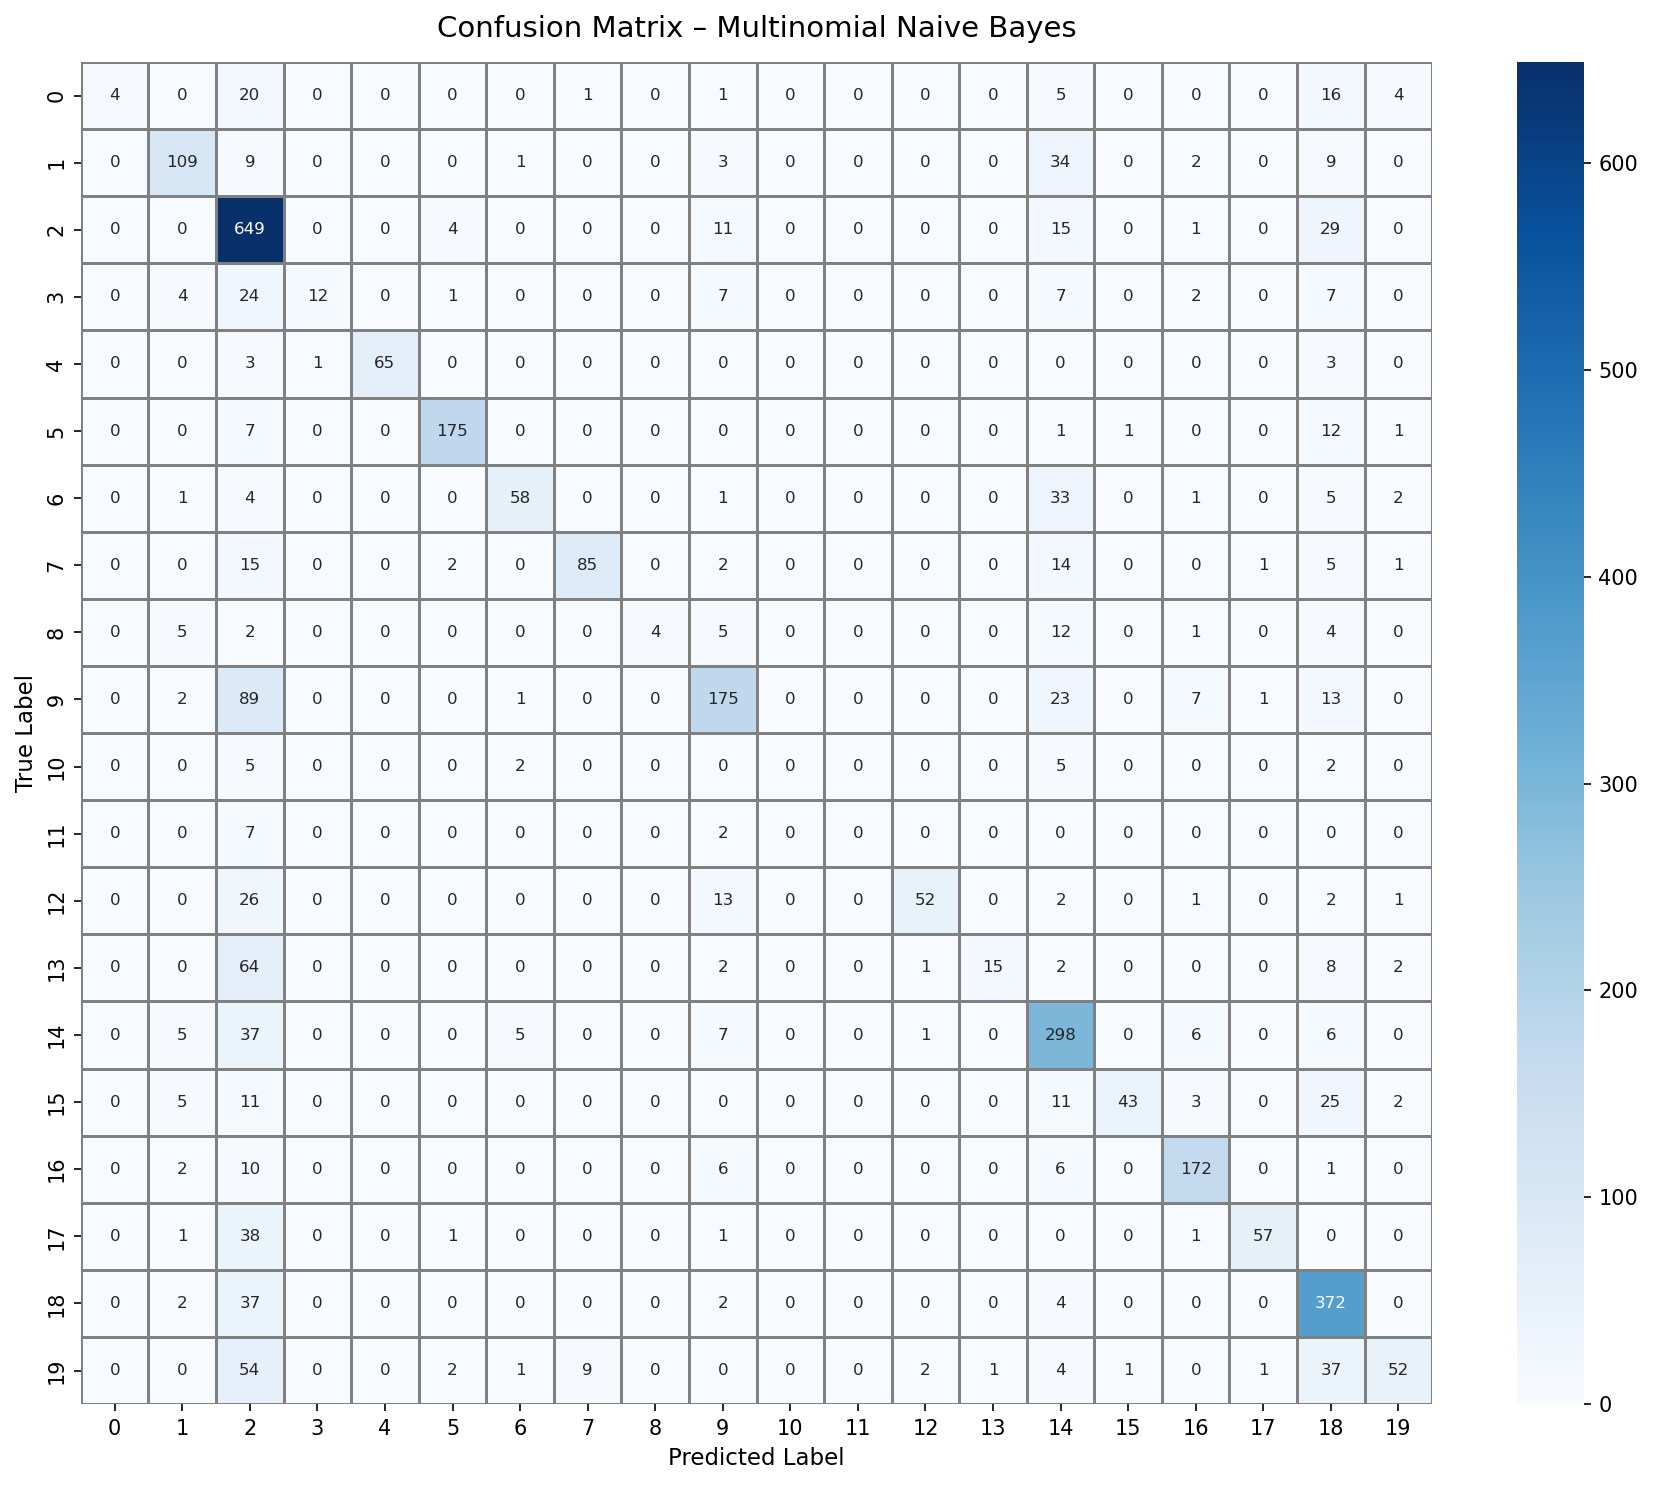

In [6]:
import os
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Ensure output directory exists
output_dir = "../outputs/plots"
os.makedirs(output_dir, exist_ok=True)

cm_nb = confusion_matrix(y_test, y_pred_nb)

plt.figure(figsize=(12, 10), dpi=150)
sns.heatmap(
    cm_nb,
    cmap="Blues",
    annot=True,
    fmt="d",
    annot_kws={"size": 8},
    linewidths=0.5,
    linecolor="gray",
    cbar=True
)

plt.title("Confusion Matrix – Multinomial Naive Bayes", fontsize=14, pad=12)
plt.xlabel("Predicted Label", fontsize=11)
plt.ylabel("True Label", fontsize=11)

plt.tight_layout()

save_path = os.path.join(output_dir, "confusion_matrix_naive_bayes.png")
plt.savefig(save_path, dpi=300, bbox_inches="tight")

plt.show()


# Baseline Model Comparison Summary

This section compares the performance of two baseline models—Logistic
Regression and Multinomial Naive Bayes—trained on the same TF-IDF feature
representation for Twitter Financial News classification.

---

## 1. Models Compared
- **Logistic Regression**: A linear classifier well-suited for high-dimensional
  sparse text data, configured with class weighting to handle imbalance.
- **Multinomial Naive Bayes**: A probabilistic model commonly used for text
  classification, serving as a fast and simple baseline.

---

## 2. Feature Consistency
Both models were trained using identical preprocessing steps:
- Cleaned tweet text
- Stratified train–test split
- TF-IDF vectorization with unigrams and bigrams

This ensures a fair and unbiased comparison between models.

---

## 3. Performance Comparison
Logistic Regression demonstrated more stable and balanced performance across
most financial categories. It produced stronger macro and weighted F1-scores,
particularly for majority classes such as **Company / Product News**, **Macro**,
and **Stock Commentary**.

Naive Bayes performed competitively on frequent classes but showed limitations
on minority categories. In several low-frequency labels, the model produced no
predictions, resulting in lower precision and recall.

---

## 4. Error Patterns and Class Imbalance
Both models were affected by class imbalance; however, the impact was more
pronounced for Naive Bayes. Logistic Regression benefited from class weighting,
which improved its ability to generalize across underrepresented categories.

Confusion matrix analysis revealed that misclassifications primarily occurred
between semantically similar financial topics.

---

## 5. Key Takeaways
- Logistic Regression provides a stronger and more reliable baseline for this
  multi-class, imbalanced text classification problem.
- Naive Bayes serves as a useful comparison model but struggles with minority
  classes.
- Class imbalance plays a significant role in model performance and should be
  explicitly addressed in advanced modeling stages.

---

## 6. Conclusion
Based on comparative evaluation, Logistic Regression is selected as the primary
baseline model. The insights gained from this comparison guide the transition
toward advanced models and further optimization techniques.


## Advanced Model: Linear Support Vector Machine (SVM)

This section trains a Linear Support Vector Machine classifier on TF-IDF
features. Linear SVM is a strong classical model for high-dimensional
sparse text data and often outperforms basic baselines.


In [7]:
from sklearn.svm import LinearSVC

# Initialize Linear SVM
svm_model = LinearSVC(
    class_weight="balanced",  # handle class imbalance
    random_state=42
)

# Train the model
svm_model.fit(X_train_tfidf, y_train)

print("Linear SVM model training completed.")


Linear SVM model training completed.


## Model Evaluation – Linear SVM

The Linear SVM model is evaluated using accuracy and detailed
classification metrics to compare its performance against other models.


In [8]:
from sklearn.metrics import accuracy_score, classification_report

# Generate predictions
y_pred_svm = svm_model.predict(X_test_tfidf)

# Evaluation metrics
print("Accuracy Score:")
print(accuracy_score(y_test, y_pred_svm))

print("\nClassification Report:")
print(
    classification_report(
        y_test,
        y_pred_svm,
        zero_division=0
    )
)


Accuracy Score:
0.8064896755162242

Classification Report:
              precision    recall  f1-score   support

           0       0.59      0.63      0.61        51
           1       0.83      0.84      0.83       167
           2       0.84      0.76      0.80       709
           3       0.64      0.77      0.70        64
           4       0.97      0.96      0.97        72
           5       0.93      0.94      0.94       197
           6       0.80      0.90      0.84       105
           7       0.79      0.88      0.83       125
           8       0.69      0.67      0.68        33
           9       0.73      0.70      0.72       311
          10       0.76      0.93      0.84        14
          11       0.78      0.78      0.78         9
          12       0.80      0.87      0.83        97
          13       0.68      0.70      0.69        94
          14       0.81      0.79      0.80       365
          15       0.81      0.79      0.80       100
          16       0.8

## Confusion Matrix – Linear SVM

This confusion matrix visualizes the prediction performance of the
Linear SVM classifier across all financial categories.


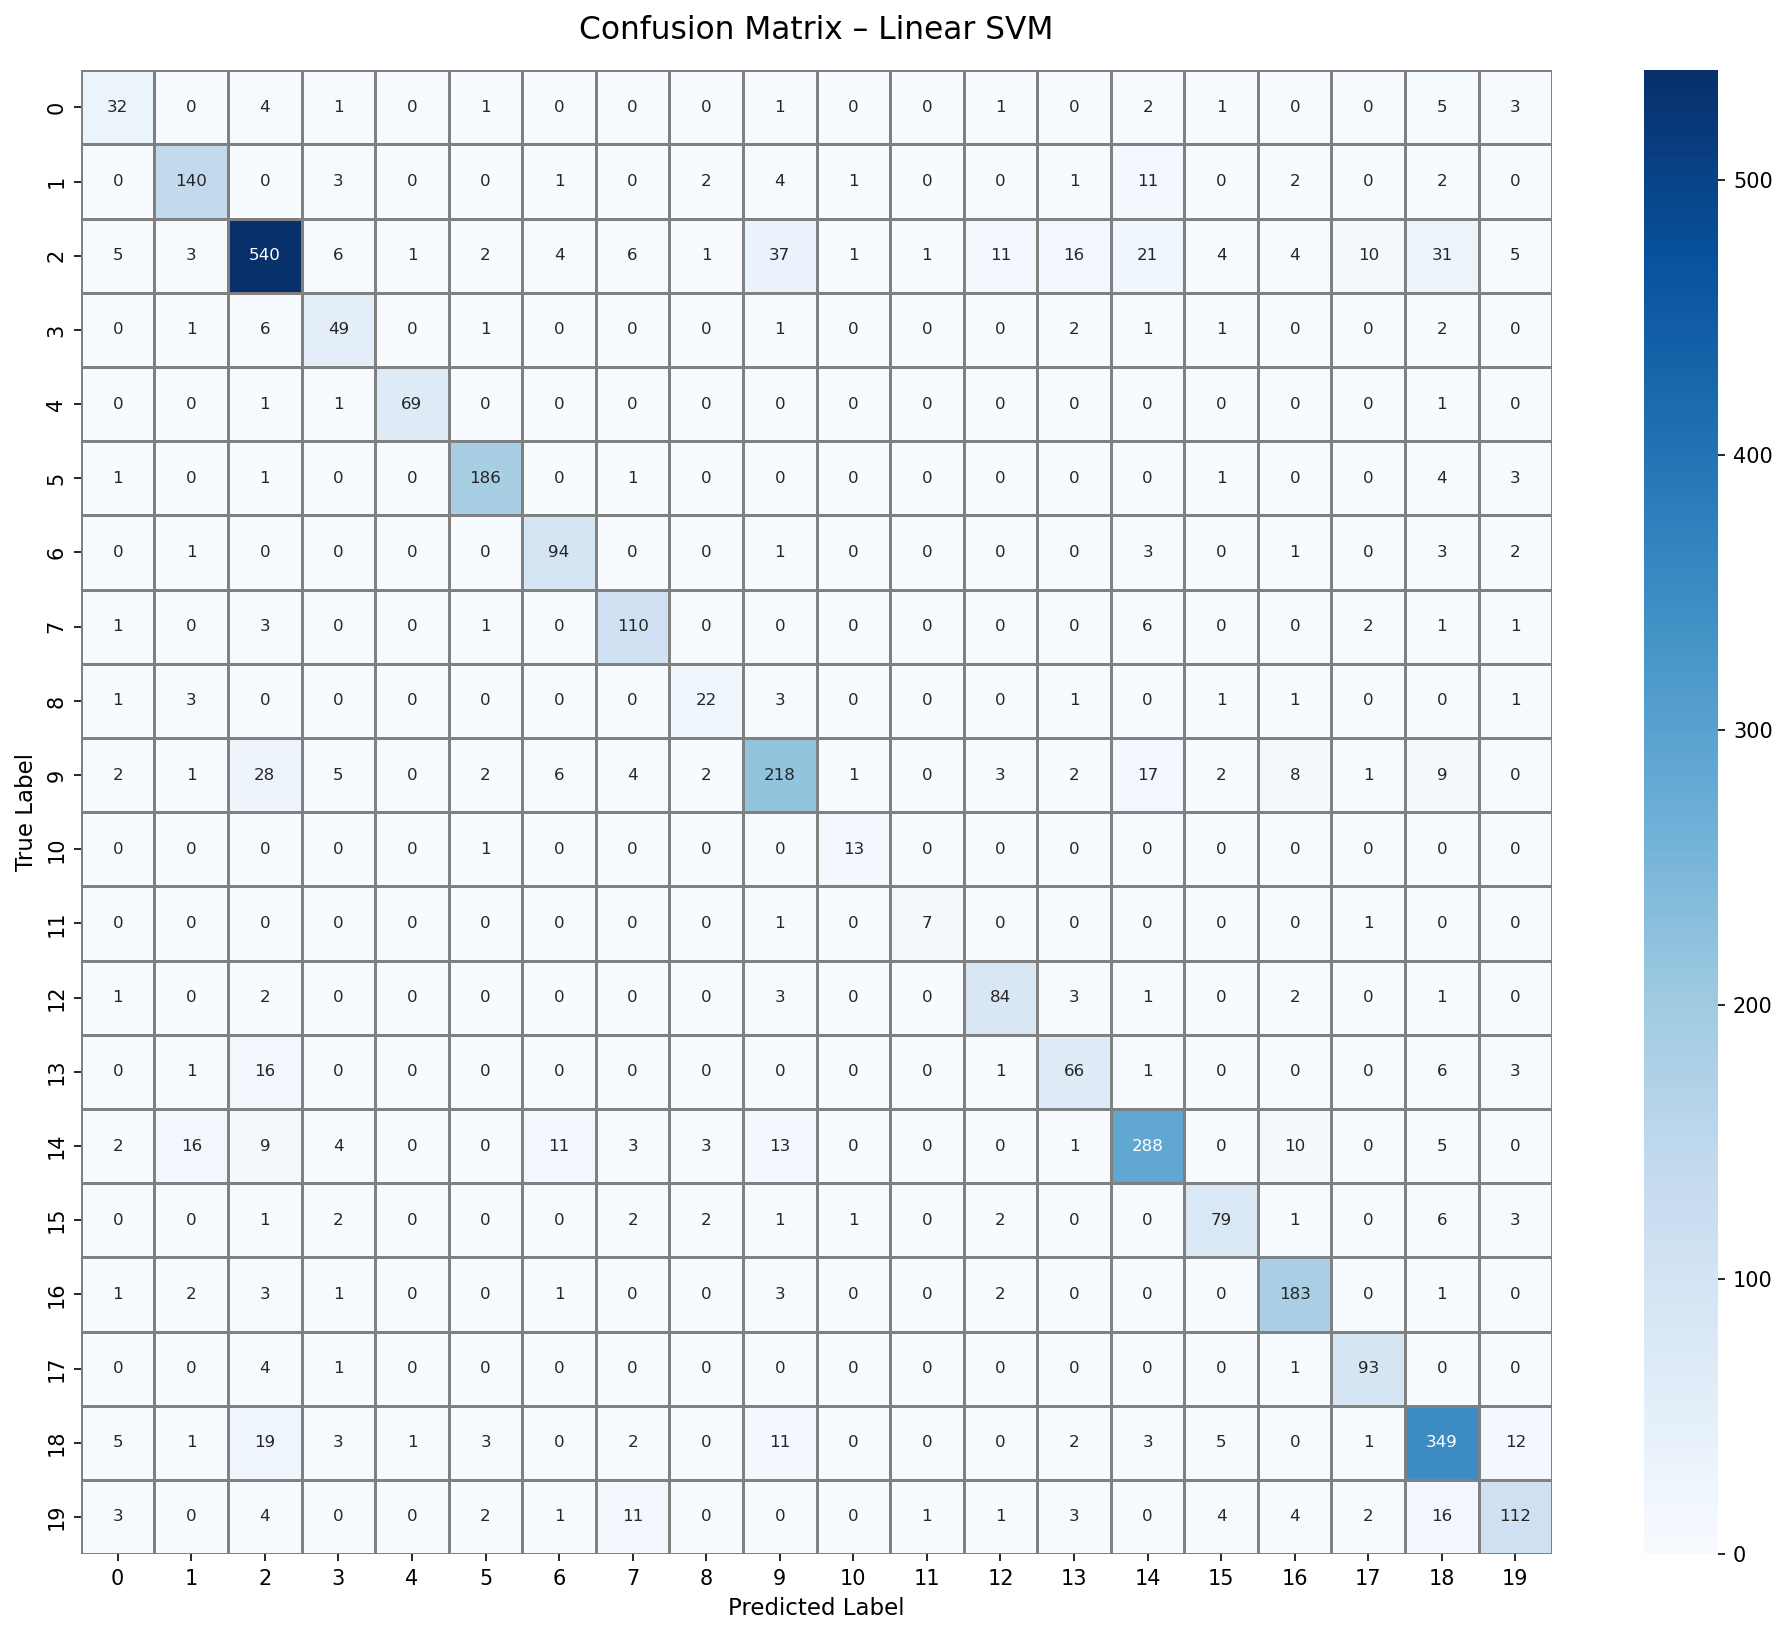

In [9]:
import os
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Ensure output directory exists
output_dir = "../outputs/plots"
os.makedirs(output_dir, exist_ok=True)

# Compute confusion matrix
cm_svm = confusion_matrix(y_test, y_pred_svm)

# Plot
plt.figure(figsize=(13, 11), dpi=150)
sns.heatmap(
    cm_svm,
    cmap="Blues",
    annot=True,
    fmt="d",
    annot_kws={"size": 8},
    linewidths=0.5,
    linecolor="gray",
    cbar=True
)

plt.title("Confusion Matrix – Linear SVM", fontsize=15, pad=15)
plt.xlabel("Predicted Label", fontsize=11)
plt.ylabel("True Label", fontsize=11)

plt.tight_layout()

# Save high-quality image
save_path = os.path.join(output_dir, "confusion_matrix_linear_svm.png")
plt.savefig(save_path, dpi=300, bbox_inches="tight")

plt.show()


# Model Comparison Summary

This section presents a comparative analysis of three classical machine
learning models—Logistic Regression, Multinomial Naive Bayes, and Linear
Support Vector Machine—applied to the Twitter Financial News classification
task using TF-IDF features.

---

## 1. Models Evaluated

### Logistic Regression
Logistic Regression was used as the primary baseline model. It is well-suited
for high-dimensional sparse text data and was configured with class weighting
to address class imbalance. The model demonstrated stable and interpretable
performance across most financial categories.

### Multinomial Naive Bayes
Multinomial Naive Bayes was implemented as a secondary baseline for comparison.
While computationally efficient and effective for frequent classes, the model
showed limitations when handling minority categories due to its probabilistic
assumptions and sensitivity to class imbalance.

### Linear Support Vector Machine (SVM)
Linear SVM was evaluated as an advanced classical model. Its ability to learn
sharper decision boundaries in high-dimensional feature spaces resulted in
improved generalization and stronger performance compared to the baseline
models.

---

## 2. Feature and Evaluation Consistency
All three models were trained and evaluated using identical preprocessing
steps, including cleaned text input, stratified train–test splits, and
TF-IDF vectorization with unigrams and bigrams. This ensured a fair and
unbiased comparison across models.

---

## 3. Performance Comparison
Logistic Regression provided a strong and reliable baseline, particularly
for majority classes such as **Company / Product News**, **Macro**, and
**Stock Commentary**. However, performance on minority classes remained
limited despite class weighting.

Naive Bayes performed competitively on high-frequency categories but struggled
with underrepresented classes, occasionally producing no predictions for
certain labels.

Linear SVM achieved the most balanced performance across categories. It showed
improved precision and recall for minority classes and reduced confusion
between semantically similar financial topics.

---

## 4. Error Analysis
Confusion matrix analysis revealed that misclassifications across all models
primarily occurred between semantically related financial categories. The
impact of class imbalance was most pronounced in Naive Bayes and least
pronounced in Linear SVM.

---

## 5. Key Takeaways
- Logistic Regression serves as a strong and interpretable baseline model.
- Naive Bayes is useful for rapid benchmarking but is sensitive to class
  imbalance.
- Linear SVM provides the best overall performance among the evaluated
  classical models.
- Class imbalance remains a key challenge and motivates the use of advanced
  modeling techniques.

---

## 6. Final Model Selection
Based on comparative evaluation, **Linear Support Vector Machine (SVM)** is
selected as the most effective classical model for this task. The insights
gained from these comparisons inform the transition toward deep learning–based
approaches for further performance improvements.
